In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import gridspec
from scipy.signal import argrelmax
from os import listdir
from os.path import isfile, join
%matplotlib inline

import json


import sys
sys.path.append('C:/Users/Experiment/PycharmProjects/PythonLab')

import functions.tracking as trk

dirpath = 'Z:/Lab/Cantilever/Measurements/150526_Silicon_nitride_with_1um_pads/LookingForResonances'
subfolder = 'pictures_zi_scans'
tag = 'Si3Ni4'

# look at all measurements and export pictures

IOError: [Errno 2] No such file or directory: 'Z:/Lab/Cantilever/Measurements/150526_Silicon_nitride_with_1um_pads/LookingForResonances/2015-06-02_13-08-26_Si3Ni4_RIO_020.csv'

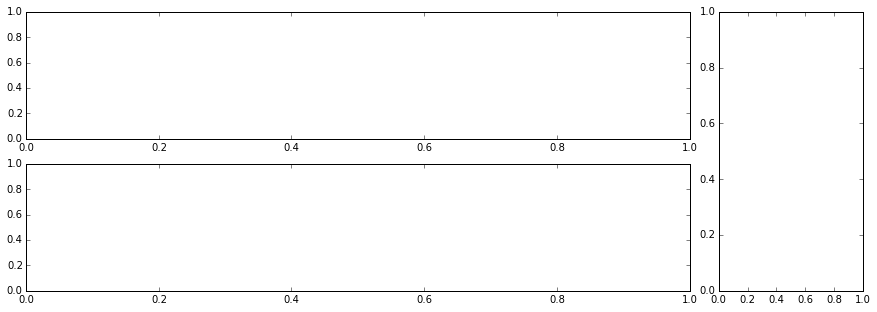

In [165]:



start_time = '2015-06-02_13-08-26'


counter = 0

for counter in np.arange(21):
    # ---------------------------------------------
    # adjust the color scale
    clim_min, clim_max = -0.03, 0
    # ---------------------------------------------


    # ========================================================================
    # define plotlayout ======================================================
    # ========================================================================

    fig = plt.figure(figsize = (15,5))

    ax_R = plt.subplot2grid((2,5), (0,0), colspan=4)
    ax_phase = plt.subplot2grid((2,5), (1,0), colspan=4)
    ax_RoI = plt.subplot2grid((2,5), (0, 4), rowspan=4)




    # ========================================================================
    # plot RoI ===============================================================
    # ========================================================================

    # load

    filename = '{:s}_{:s}'.format(start_time,tag)

    roi_image_data = np.loadtxt('{:s}/{:s}_RIO_{:03d}.csv'.format(dirpath, filename, counter), delimiter=',')

    with open('{:s}/{:s}_RIO_{:03d}.rio'.format(dirpath, filename, counter), 'r') as infile:
         roi = json.load(infile)

    with open('{:s}/{:s}_sweep_{:03d}.sweep'.format(dirpath, filename, counter), 'r') as infile:
        sweep = json.load(infile)

    roi_xVmin, roi_xVmax, roi_xPts, roi_yVmin, roi_yVmax, roi_yPts = trk.rio_to_galvoparameter(roi)

    X, Y = np.meshgrid(np.linspace(roi_xVmin, roi_xVmax, roi_xPts),  np.linspace(roi_yVmin, roi_yVmax, roi_yPts))

    #  plot close up
    # fig_RoI = plt.figure()
    # ax_RoI = plt.subplot(1,1,1)
    ax_RoI.pcolor(X, Y, roi_image_data)
    # plt.colorbar()
    # ax_RoI.set_clim(clim_min, clim_max)


    ax_RoI.set_xlim([roi_xVmin, roi_xVmax])
    ax_RoI.set_ylim([roi_yVmin, roi_yVmax])
    ax_RoI.set_xticks([roi_xVmin, roi_xVmax])
    ax_RoI.set_yticks([roi_yVmin, roi_yVmax])

    ax_RoI.set_aspect(roi_yPts / roi_xPts)
    ax_RoI.plot(roi['xo'], roi['yo'], 'kx' , ms = 20, mew = 5)

    ax_RoI.yaxis.tick_right()

    # ========================================================================
    # plot ZI data ===============================================================
    # ========================================================================




    df = pd.read_csv('{:s}/{:s}_RIO_{:03d}.dat'.format(dirpath, filename, counter))
    # df = pd.DataFrame(self.dataFinal, columns = ['Frequency', 'X', 'Y'])
    # df.to_csv(filepath, index = False, header=1)
    f = df['Frequency'].as_matrix() * 1e-6
    r = df['X'].as_matrix()**2 + df['Y'].as_matrix()**2
    # convert to W
    r /= 50
    # convert to dBm
    r = 10 * np.log10(r / 1e-3)


    phi = np.arctan2(df['Y'].as_matrix(), df['X'].as_matrix()) * 180. / np.pi

    # fig = plt.figure(figsize = (15,5))

    # gs = gridspec.GridSpec(2, 1)
    # ax_R = plt.subplot(gs[0])
    # ax_phase = plt.subplot(gs[1], sharex=ax_R)






    plt.setp(ax_R.get_xticklabels(), visible=False)

    # ax_R.semilogy(f, r)
    ax_R.set_ylabel('amp (dBm)')
    ax_R.plot(f, r)
    # ax_R.set_ylabel('r (arb. units)')
    ax_R.set_xlim([sweep['freqStart']*1e-6, sweep['freqEnd']*1e-6])

    ax_phase.plot(f, phi )
    ax_phase.set_ylim([-180, 180])
    ax_phase.set_ylabel('phase (deg)')
    ax_phase.set_xlabel('frequency  (Mhz)')
    ax_phase.set_xlim([sweep['freqStart']*1e-6, sweep['freqEnd']*1e-6])

    # plt.suptitle('interval  {:03d}'.format(counter))
    ax_R.set_title('interval  {:03d}'.format(counter))
    
    # save fig to subfolder
    fig.savefig('{:s}/{:s}/{:s}_RIO_{:03d}.png'.format(dirpath, subfolder, filename, counter)) 
    plt.close(fig)

# close up on resonances

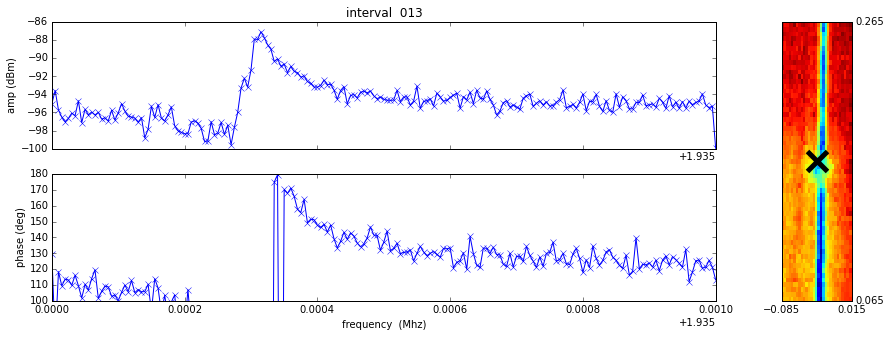

In [180]:

start_time = '2015-06-02_13-08-26'


counter = 13
f_min = 1.935
f_max = 1.936

# counter = 9
# f_min = 1.887+0.0065
# f_max = 1.887+0.0075


# ---------------------------------------------
# adjust the color scale
clim_min, clim_max = -0.03, 0
# ---------------------------------------------


# ========================================================================
# define plotlayout ======================================================
# ========================================================================

fig = plt.figure(figsize = (15,5))

ax_R = plt.subplot2grid((2,5), (0,0), colspan=4)
ax_phase = plt.subplot2grid((2,5), (1,0), colspan=4)
ax_RoI = plt.subplot2grid((2,5), (0, 4), rowspan=4)




# ========================================================================
# plot RoI ===============================================================
# ========================================================================

# load

filename = '{:s}_{:s}'.format(start_time,tag)

roi_image_data = np.loadtxt('{:s}/{:s}_RIO_{:03d}.csv'.format(dirpath, filename, counter), delimiter=',')

with open('{:s}/{:s}_RIO_{:03d}.rio'.format(dirpath, filename, counter), 'r') as infile:
     roi = json.load(infile)

with open('{:s}/{:s}_sweep_{:03d}.sweep'.format(dirpath, filename, counter), 'r') as infile:
    sweep = json.load(infile)

roi_xVmin, roi_xVmax, roi_xPts, roi_yVmin, roi_yVmax, roi_yPts = trk.rio_to_galvoparameter(roi)

X, Y = np.meshgrid(np.linspace(roi_xVmin, roi_xVmax, roi_xPts),  np.linspace(roi_yVmin, roi_yVmax, roi_yPts))

#  plot close up
# fig_RoI = plt.figure()
# ax_RoI = plt.subplot(1,1,1)
ax_RoI.pcolor(X, Y, roi_image_data)
# plt.colorbar()
# ax_RoI.set_clim(clim_min, clim_max)


ax_RoI.set_xlim([roi_xVmin, roi_xVmax])
ax_RoI.set_ylim([roi_yVmin, roi_yVmax])
ax_RoI.set_xticks([roi_xVmin, roi_xVmax])
ax_RoI.set_yticks([roi_yVmin, roi_yVmax])

ax_RoI.set_aspect(roi_yPts / roi_xPts)
ax_RoI.plot(roi['xo'], roi['yo'], 'kx' , ms = 20, mew = 5)

ax_RoI.yaxis.tick_right()

# ========================================================================
# plot ZI data ===============================================================
# ========================================================================




df = pd.read_csv('{:s}/{:s}_RIO_{:03d}.dat'.format(dirpath, filename, counter))
# df = pd.DataFrame(self.dataFinal, columns = ['Frequency', 'X', 'Y'])
# df.to_csv(filepath, index = False, header=1)
f = df['Frequency'].as_matrix() * 1e-6
r = df['X'].as_matrix()**2 + df['Y'].as_matrix()**2
# convert to W
r /= 50
# convert to dBm
r = 10 * np.log10(r / 1e-3)


phi = np.arctan2(df['Y'].as_matrix(), df['X'].as_matrix()) * 180. / np.pi

# fig = plt.figure(figsize = (15,5))

# gs = gridspec.GridSpec(2, 1)
# ax_R = plt.subplot(gs[0])
# ax_phase = plt.subplot(gs[1], sharex=ax_R)





plt.setp(ax_R.get_xticklabels(), visible=False)

# ax_R.semilogy(f, r)
ax_R.set_ylabel('amp (dBm)')
ax_R.plot(f, r, 'x-')
# ax_R.set_ylabel('r (arb. units)')
ax_R.set_xlim([f_min, f_max])
# ax_R.set_xlim([sweep['freqStart']*1e-6, sweep['freqEnd']*1e-6])


ax_phase.plot(f, phi, 'x-' )
# ax_phase.set_ylim([-180, 180])
ax_phase.set_ylim([100, 180])
ax_phase.set_ylabel('phase (deg)')
ax_phase.set_xlabel('frequency  (Mhz)')
# ax_phase.set_xlim([sweep['freqStart']*1e-6, sweep['freqEnd']*1e-6])
ax_phase.set_xlim([f_min, f_max])

# plt.suptitle('interval  {:03d}'.format(counter))
ax_R.set_title('interval  {:03d}'.format(counter))

# save fig to subfolder
# fig.savefig('{:s}/{:s}/{:s}_RIO_{:03d}.png'.format(dirpath, subfolder, filename, counter)) 
# plt.close(fig)

In [181]:
f_min, f_max

(1.935, 1.936)

In [182]:
(f_max - f_min)/200*1e6

4.999999999999449